In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df_pure=pd.read_csv('Galeão.csv')
df_pure.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1973,27.22,27.46,25.19,25.98,21.91,22.25,21.63,20.52,20.95,21.95,22.55,25.36,26.96,24.36,21.47,21.82,23.65
1,1974,26.19,26.67,26.07,23.45,22.27,20.21,20.71,21.32,22.42,22.31,24.02,24.08,26.07,23.93,20.75,22.92,23.42
2,1975,24.81,26.46,25.97,22.36,20.91,20.04,19.22,22.52,21.94,22.19,23.65,26.10,25.12,23.08,20.59,22.59,22.85
3,1976,27.05,25.77,25.12,24.56,21.58,20.75,19.71,20.72,20.84,21.63,23.97,25.15,26.31,23.75,20.39,22.15,23.15
4,1977,26.72,28.10,26.47,23.81,21.94,21.72,22.66,21.88,22.03,23.51,24.07,24.45,26.66,24.07,22.09,23.20,24.00


In [59]:
df_pure.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1998.500000,83.174423,83.463077,63.916923,62.514808,97.723462,77.866731,96.261154,97.013269,97.490769,98.706154,99.633846,119.697308,82.963077,62.198269,96.656154,98.610577,99.148846
std,15.154757,229.047241,228.973516,189.024978,189.309393,262.977775,230.371922,263.404836,263.185349,263.046852,262.692568,262.421772,289.892713,229.097989,189.371426,263.288777,262.719491,262.561957
min,1973.000000,23.490000,25.320000,24.430000,22.360000,20.910000,19.500000,19.000000,19.750000,20.270000,21.530000,22.550000,24.080000,24.700000,22.810000,19.870000,21.820000,22.850000
25%,1985.750000,26.365000,26.735000,25.930000,24.455000,22.087500,20.672500,20.447500,21.120000,21.650000,22.987500,24.007500,25.545000,26.307500,24.370000,20.965000,22.927500,23.665000
50%,1998.500000,27.220000,27.520000,26.570000,25.215000,22.625000,21.410000,21.215000,21.880000,22.125000,23.515000,24.540000,26.100000,26.815000,24.635000,21.495000,23.490000,24.185000
75%,2011.250000,28.280000,28.107500,27.257500,25.750000,23.092500,22.395000,21.825000,22.535000,23.240000,24.932500,25.260000,26.807500,27.477500,25.372500,22.017500,24.297500,24.615000
max,2024.000000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000


In [60]:
# checking null values on the dataframe
df_pure.isnull().values.any()

False

In [61]:
# How many inconsistent values (greater than 50) 
df_pure[df_pure > 55].count()

YEAR      52
JAN        3
FEB        3
MAR        2
APR        2
MAY        4
JUN        3
JUL        4
AUG        4
SEP        4
OCT        4
NOV        4
DEC        5
D-J-F      3
M-A-M      2
J-J-A      4
S-O-N      4
metANN     4
dtype: int64

In [62]:
def preprocess(df_pure):
  df = df_pure.copy()

  # rename columns
  df = df.rename(columns={'metANN' : 'Annual Temp', 'YEAR' : 'Year','D-J-F' : 'Summer','M-A-M' : 'Autumn', 'J-J-A' : 'Winter', 'S-O-N' : 'Spring' })

  # replacing inconsistent values (999.90): condition: values equal or greater then 55 ºC
  # for all columns, except for 'Year', replace values above 55 ºC by null (np.nan)
  for i in df.columns:
    if i != 'Year':
      df.loc[df[i] >= 55, i] = np.nan

  # fill np.nan values with the mean of each column
  df = df.fillna(df.mean())

  return df

df = preprocess(df_pure)
df.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Summer,Autumn,Winter,Spring,Annual Temp
0,1973,27.22,27.46,25.19,25.98,21.91,22.25,21.63,20.52,20.95,21.95,22.55,25.36,26.96,24.36,21.47,21.82,23.65
1,1974,26.19,26.67,26.07,23.45,22.27,20.21,20.71,21.32,22.42,22.31,24.02,24.08,26.07,23.93,20.75,22.92,23.42
2,1975,24.81,26.46,25.97,22.36,20.91,20.04,19.22,22.52,21.94,22.19,23.65,26.10,25.12,23.08,20.59,22.59,22.85
3,1976,27.05,25.77,25.12,24.56,21.58,20.75,19.71,20.72,20.84,21.63,23.97,25.15,26.31,23.75,20.39,22.15,23.15
4,1977,26.72,28.10,26.47,23.81,21.94,21.72,22.66,21.88,22.03,23.51,24.07,24.45,26.66,24.07,22.09,23.20,24.00


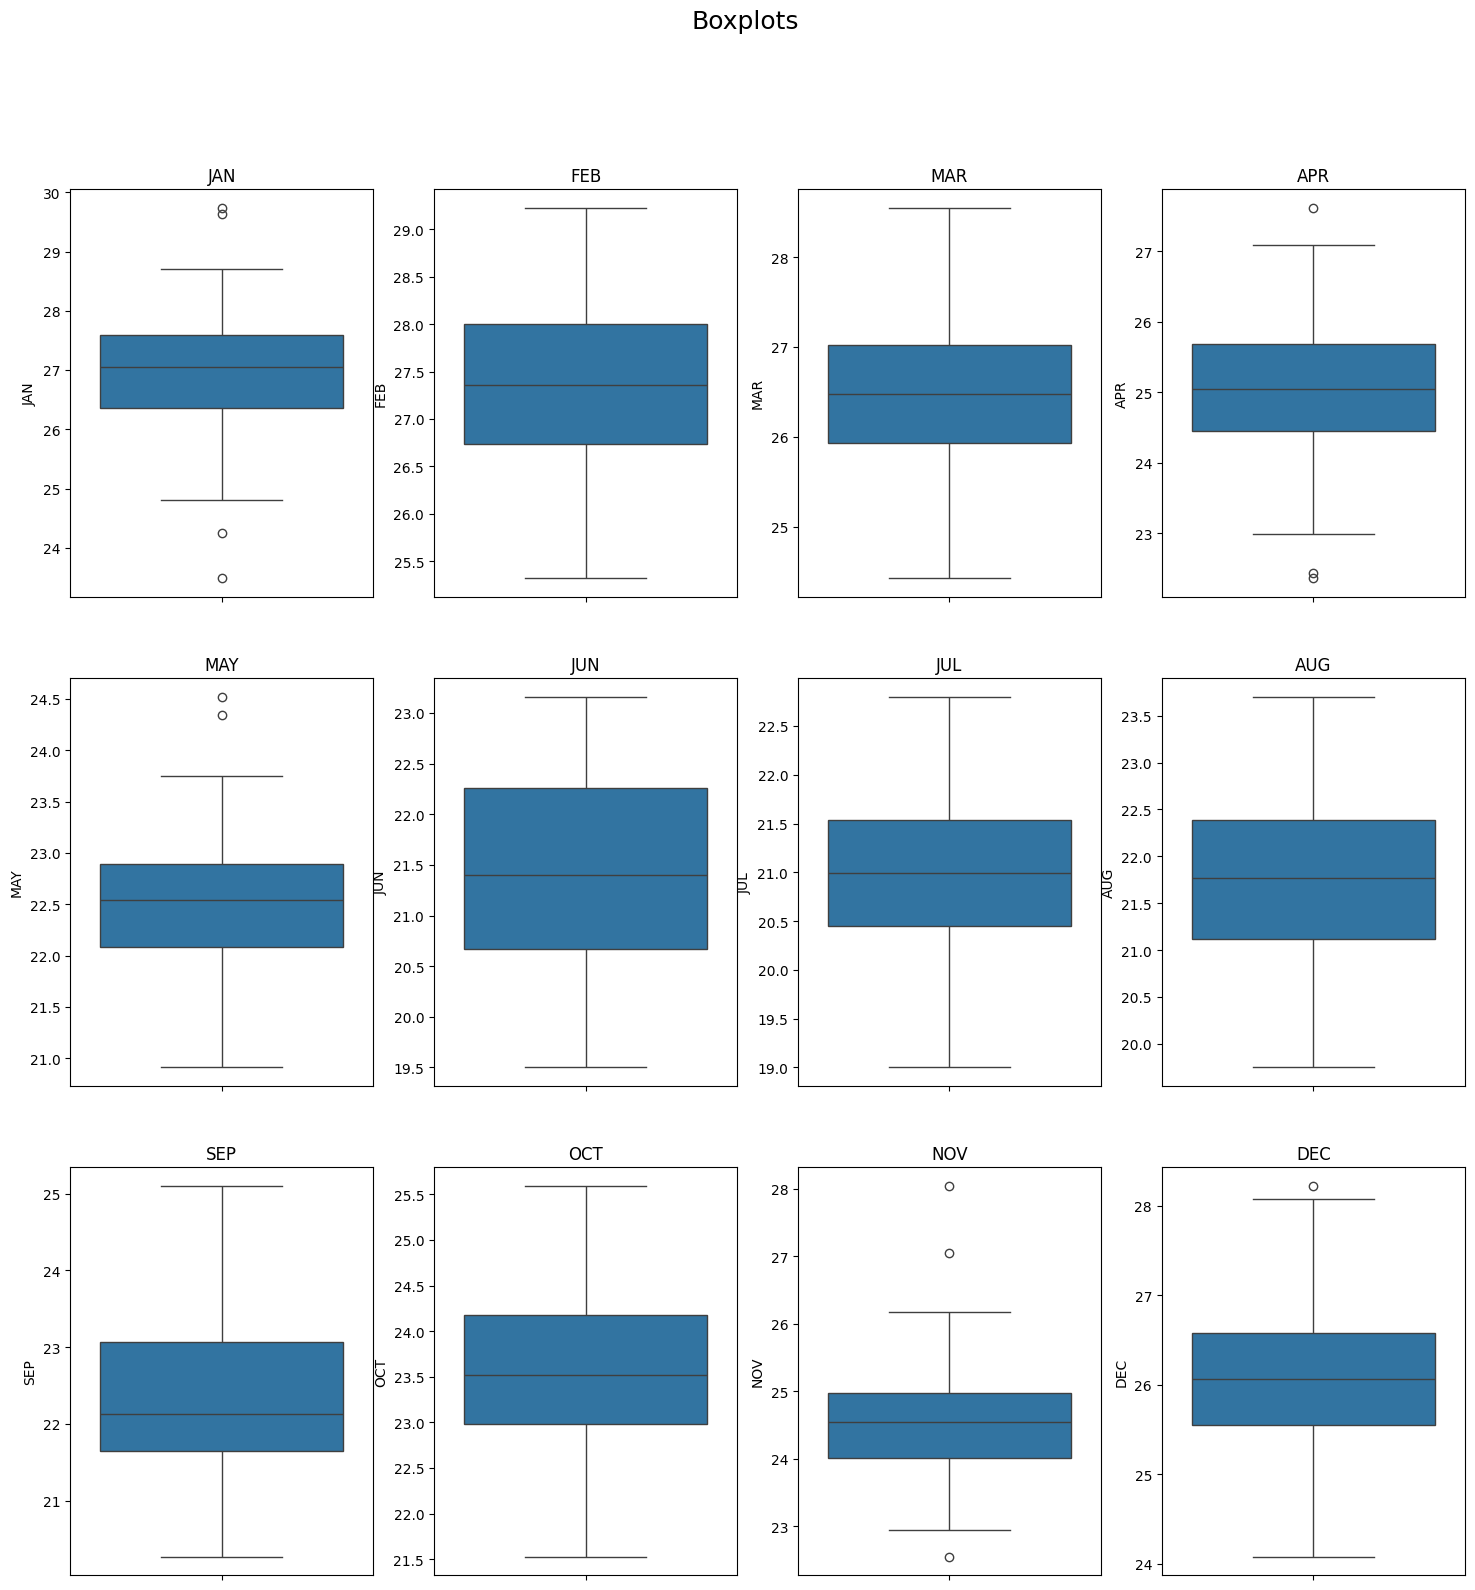

In [63]:
#outliers per month
fig = plt.figure(figsize = (18,18))
fig.suptitle('Boxplots', fontsize = 18)

vars = [j for j in df.columns if j not in ['Year', 'Summer', 'Autumn', 'Winter', 'Spring', 'Annual Temp']]

for i in range(0, len(vars)):
    ax = plt.subplot(3, 4, i + 1)
    var = vars[i]
    plt.title(var)
    sns.boxplot(data = df[var])
    plt.tick_params(labelbottom=False); # hide xticks

Years and Temperatures

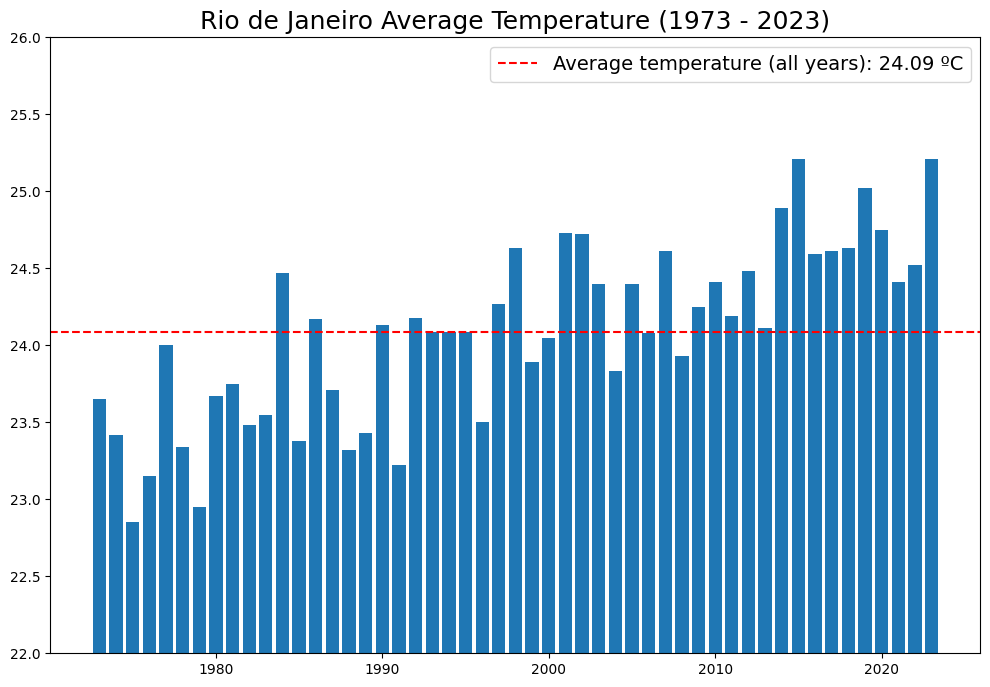

In [64]:
# Filtering out data for the year 2024
df_filtered = df[df['Year'] < 2024]

# ploting Year x Average Temperature 
fig = plt.figure(figsize = (12,8))
avg_temp = round(df_filtered['Annual Temp'].mean(), 2)
plt.bar(df_filtered['Year'], df_filtered['Annual Temp'])
plt.axhline(df_filtered['Annual Temp'].mean(), linestyle = 'dashed', color = 'red', label = f'Average temperature (all years): {avg_temp} ºC')
plt.ylim(22,26)
plt.legend(fontsize = 14)
plt.title('Rio de Janeiro Average Temperature (1973 - 2023)', fontsize = 18);

Seasons and Temperatures

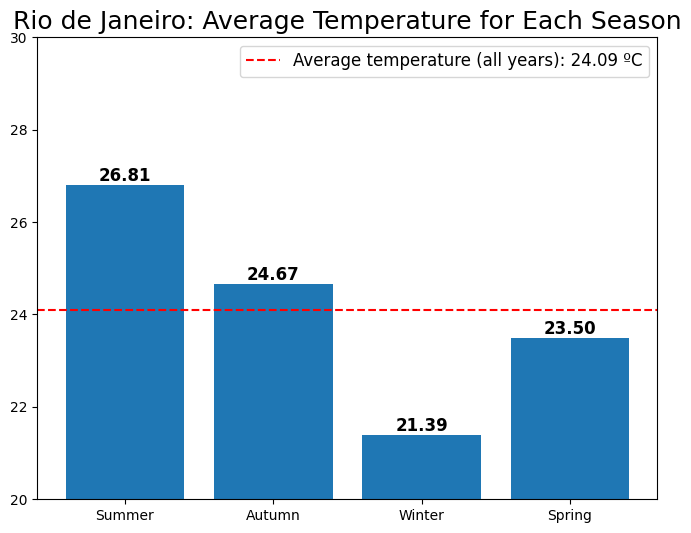

In [65]:
# average temperatures for each season
summer = round(df_filtered['Summer'].mean(), 2)
autumn = round(df_filtered['Autumn'].mean(), 2)
winter = round(df_filtered['Winter'].mean(), 2)
spring = round(df_filtered['Spring'].mean(), 2)

# preparing data to categorical bar plot
data = {'Summer': summer, 'Autumn': autumn, 'Winter': winter, 'Spring': spring}
names = list(data.keys())
values = list(data.values())

# plot average temperature for seasons
fig = plt.figure(figsize = (8,6))

bar1 = plt.bar(np.arange(len(values)), values)
plt.xticks(range(len(names)), names)
plt.title('Rio de Janeiro: Average Temperature for Each Season', fontsize = 18)
plt.ylim(20,30)

plt.axhline(avg_temp, color = 'r', linestyle = 'dashed', label = f'Average temperature (all years): {avg_temp} ºC')
plt.legend(fontsize = 12)

for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % float(height), ha='center', va='bottom', fontsize = 12, fontweight = 'bold');

Summer

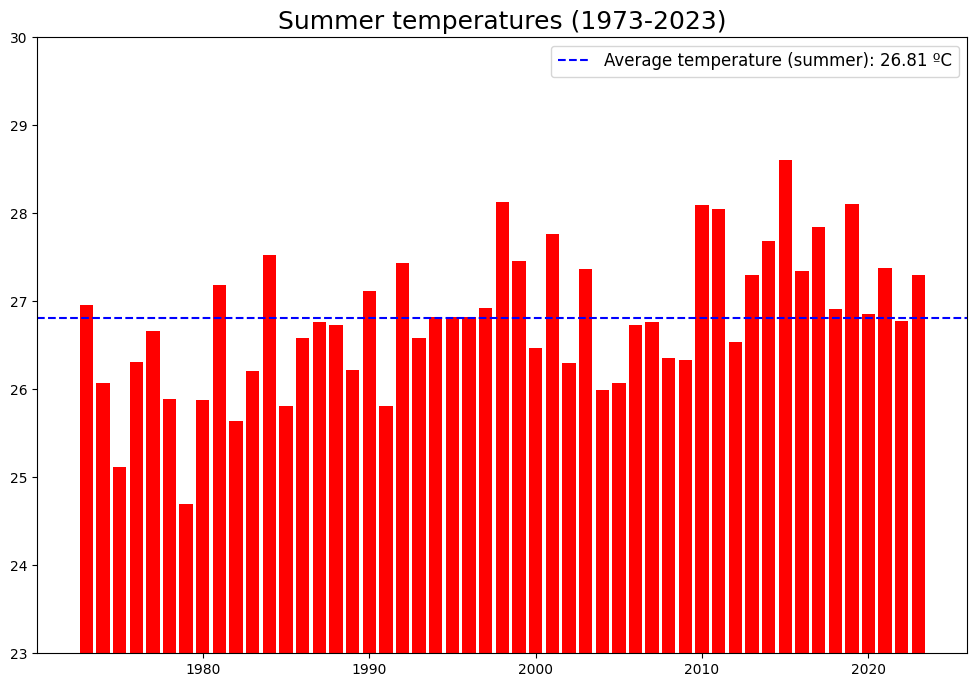

In [66]:
# Summer temperatures
fig = plt.figure(figsize = (12,8))
plt.bar(df_filtered['Year'], df_filtered['Summer'], color = 'red')

plt.axhline(summer, color = 'b', linestyle = 'dashed', label = f'Average temperature (summer): {summer} ºC')
plt.legend(fontsize = 12)

plt.ylim(23,30)
plt.title('Summer temperatures (1973-2023)', fontsize = 18);

In [67]:
# Maximum summer temperature
hottest_summer = df_filtered['Summer'].max()
print("Hottest summer temperature (average):", hottest_summer, "ºC")

idx = df_filtered['Summer'].idxmax() # index of maximum summer temperature
df_filtered['Year'][idx] # Year of maximum summer temperature

print("Year of the hottest summer:", df_filtered['Year'][idx])

Hottest summer temperature (average): 28.61 ºC
Year of the hottest summer: 2015


In [68]:
# Minimum summer temperature
coldest_summer = df_filtered['Summer'].min()
print("Coldest summer temperature (average):", coldest_summer, "ºC")

idx = df_filtered['Summer'].idxmin() # index of maximum summer temperature
df['Year'][idx] # Year of maximum summer temperature

print("Year of the coldest summer:", df['Year'][idx])

Coldest summer temperature (average): 24.7 ºC
Year of the coldest summer: 1979


Winter

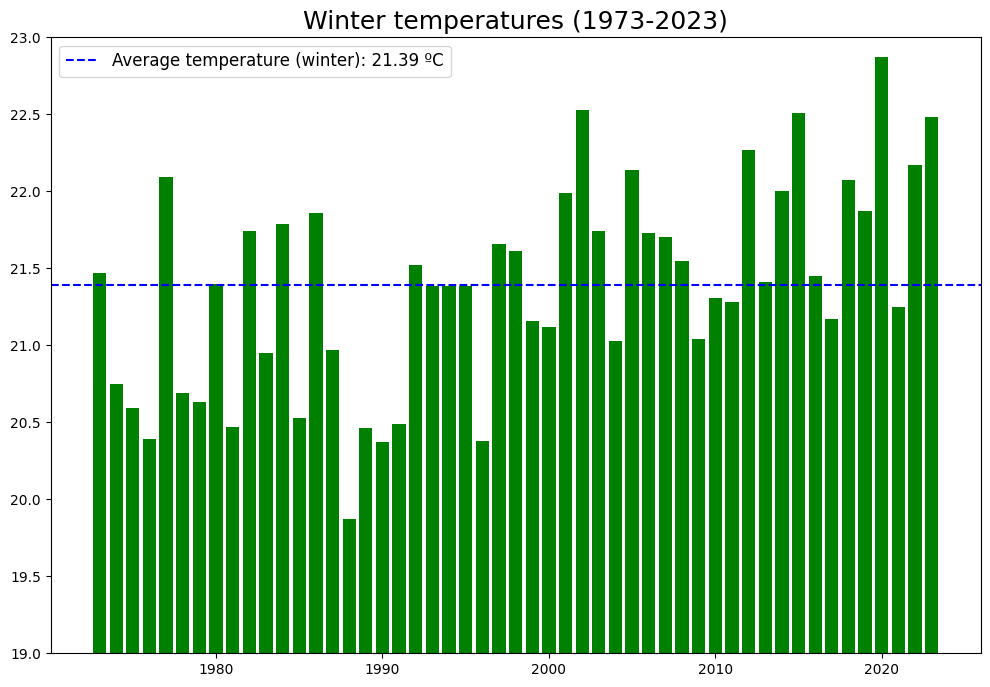

In [69]:
# Winter temperatures
fig = plt.figure(figsize = (12,8))
plt.bar(df_filtered['Year'], df_filtered['Winter'], color = 'green')

plt.axhline(winter, color = 'b', linestyle = 'dashed', label = f'Average temperature (winter): {winter} ºC')
plt.legend(fontsize = 12)

plt.ylim(19,23)
plt.title('Winter temperatures (1973-2023)', fontsize = 18);

In [70]:
# Maximum winter temperature
hottest_winter = df_filtered['Winter'].max()
print("Hottest winter temperature (average):", hottest_winter, "ºC")

idx = df_filtered['Winter'].idxmax() # index of maximum winter temperature
df['Year'][idx] # Year of maximum winter temperature

print("Year of the hottest winter:", df['Year'][idx])

Hottest winter temperature (average): 22.87 ºC
Year of the hottest winter: 2020


In [71]:
# Minimum winter temperature
coldest_winter = df_filtered['Winter'].min()
print("Coldest winter temperature (average):", coldest_winter, "ºC")

idx = df_filtered['Winter'].idxmin() # index of minimum winter temperature
df['Year'][idx] # Year of minimum winter temperature

print("Year of the coldest winter:", df['Year'][idx])

Coldest winter temperature (average): 19.87 ºC
Year of the coldest winter: 1988


Extreme temperatures

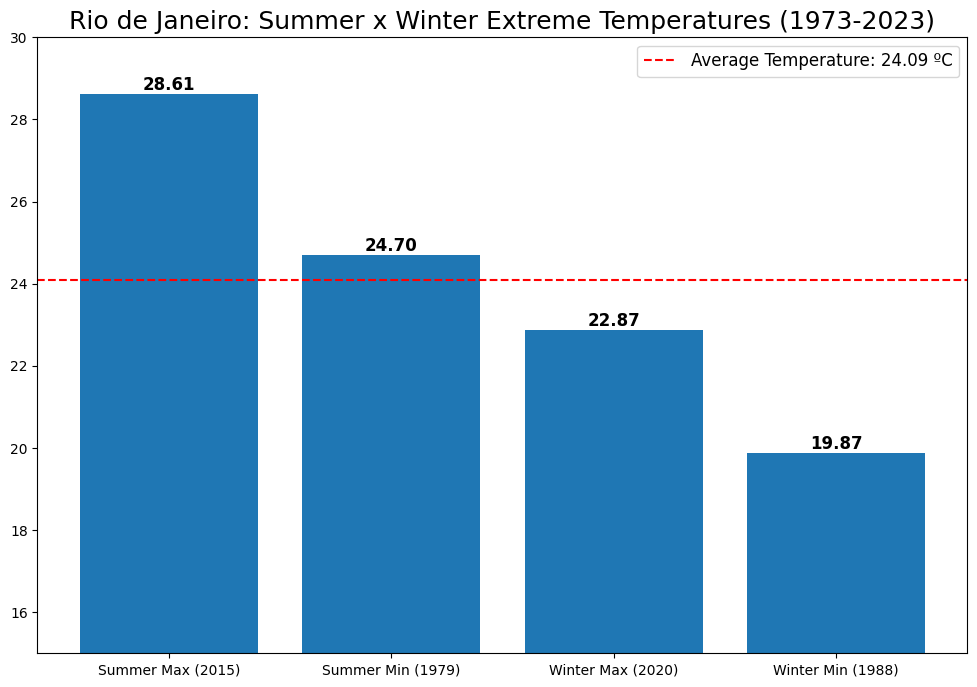

In [72]:
# preparing data to categorical bar plot
data = {'Summer Max (2015)': round(hottest_summer, 2),
        'Summer Min (1979)': round(coldest_summer, 2), 
        'Winter Max (2020)': round(hottest_winter, 2), 
        'Winter Min (1988)': round(coldest_winter, 2)}

names = list(data.keys())
values = list(data.values())

# plot extreme temperatures
fig = plt.figure(figsize = (12,8))
bar2 = plt.bar(np.arange(len(values)), values)

plt.xticks(range(len(names)), names)
plt.title('Rio de Janeiro: Summer x Winter Extreme Temperatures (1973-2023)', fontsize = 18)
plt.ylim(15,30)

plt.axhline(avg_temp, color='r', linestyle='dashed', label=f'Average Temperature: {avg_temp} ºC')

for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % float(height), ha='center', va='bottom', fontsize = 12, fontweight = 'bold')

plt.legend(fontsize=12)
plt.show()

Monthly average temperatures

In [73]:
# preparing data to plot months
data = {1: round(df['JAN'].mean(), 2),
        2: round(df['FEB'].mean(), 2), 
        3: round(df['MAR'].mean(), 2), 
        4: round(df['APR'].mean(), 2),
        5: round(df['MAY'].mean(), 2),
        6: round(df['JUN'].mean(), 2),
        7: round(df['JUL'].mean(), 2),
        8: round(df['AUG'].mean(), 2),
        9: round(df['SEP'].mean(), 2),
        10: round(df['OCT'].mean(), 2),
        11: round(df['NOV'].mean(), 2),
        12: round(df['DEC'].mean(), 2)}

names = list(data.keys())
values = list(data.values())

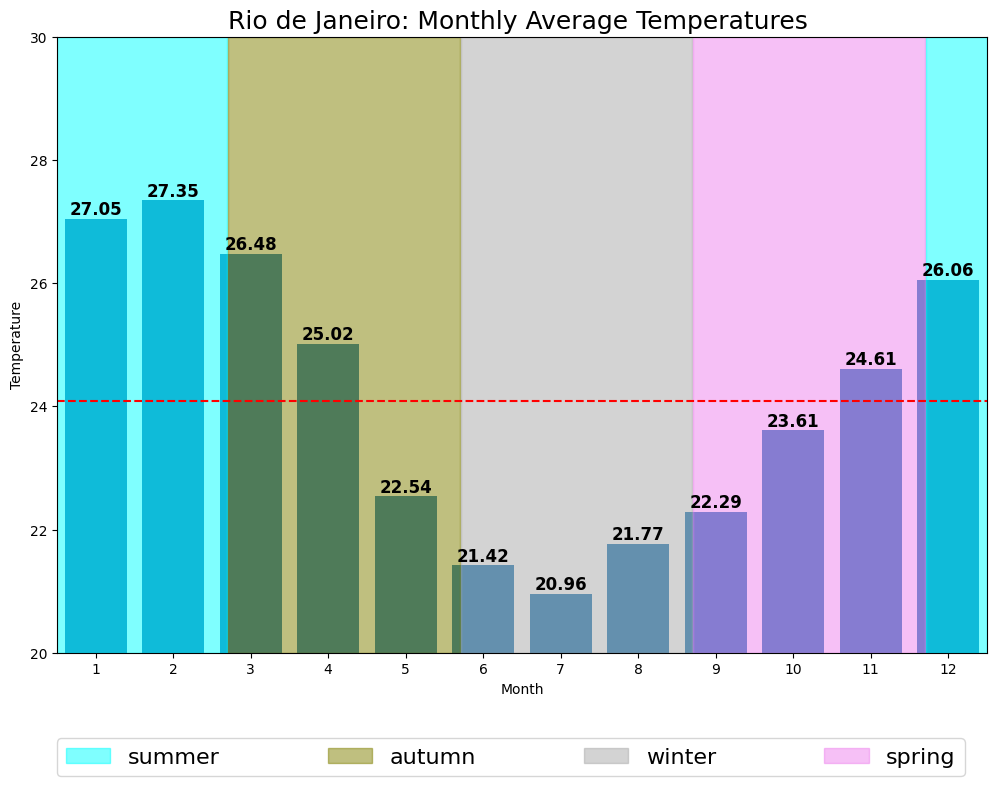

In [74]:
fig = plt.figure(figsize = (12,8))
plt.title('Rio de Janeiro: Monthly Average Temperatures ', fontsize = 18)

abscissa = np.arange(1, len(values) + 1)
plt.xticks(abscissa)

bar1 = plt.bar(abscissa, values)

plt.xlabel("Month")
plt.ylabel('Temperature')

plt.xlim(0.5, 12.5)
plt.ylim(20, 30)

# fill background
plt.axvspan(0.5, 2.7, alpha=0.5, color='aqua', label = 'summer') # summer
plt.axvspan(2.71, 5.7, alpha=0.5, color='olive', label = 'autumn') # autumn
plt.axvspan(5.71, 8.7, alpha=0.5, color='darkgrey', label = 'winter') # winter
plt.axvspan(8.71, 11.7, alpha=0.5, color='violet', label = 'spring') # spring
plt.axvspan(11.71, 12.5, alpha=0.5, color='aqua') # summer

plt.legend(loc = (0, -0.2),
           mode = 'expand', 
           bbox_transform = fig.transFigure,
           ncol=4,
           fontsize = 16)

plt.axhline(avg_temp, color = 'r', linestyle = 'dashed');

# labels for each month
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,
             '%.2f' % float(height),
             ha='center',
             va='bottom',
             fontsize = 12,
             fontweight = 'bold')

Annual Mean Temperature Analysis

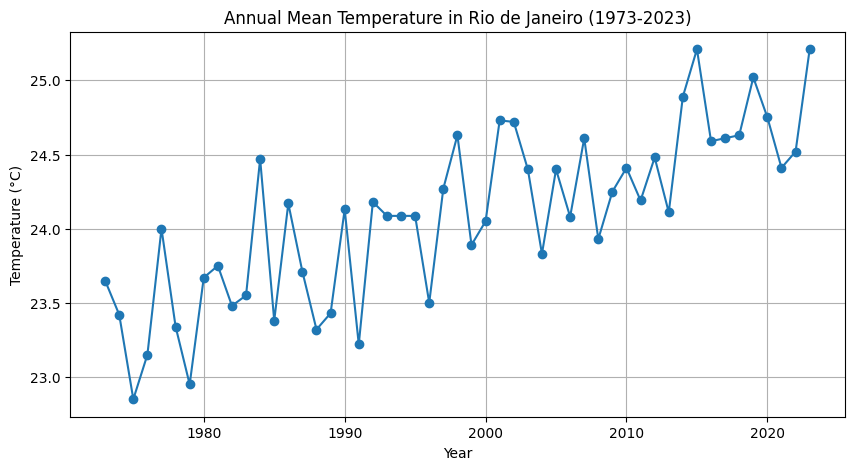

In [75]:
# Plot the annual mean temperature over the years with cleaned data
plt.figure(figsize=(10, 5))
plt.plot(df_filtered['Year'], df_filtered['Annual Temp'], marker='o')
plt.title('Annual Mean Temperature in Rio de Janeiro (1973-2023)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

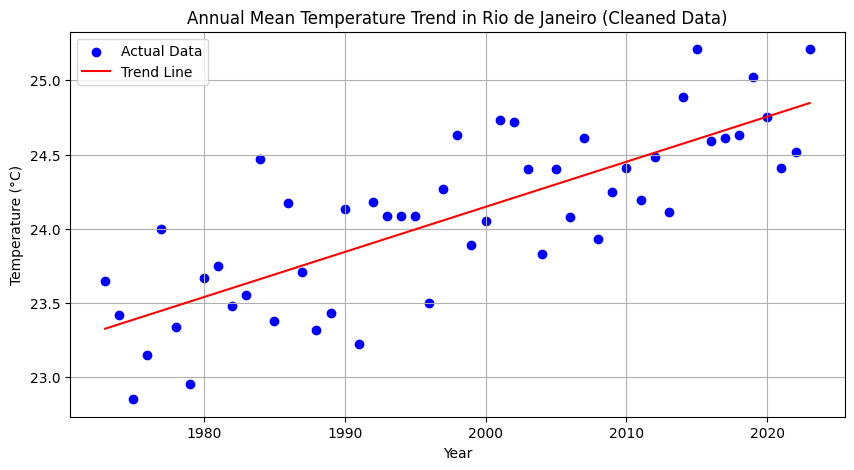

Temperature increase per year: 0.0304 °C/year


In [76]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Linear regression for annual mean temperature
X = df_filtered['Year'].values.reshape(-1, 1)
y = df_filtered['Annual Temp'].values

model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(df_filtered['Year'], df_filtered['Annual Temp'], color='blue', label='Actual Data')
plt.plot(df_filtered['Year'], y_pred, color='red', label='Trend Line')
plt.title('Annual Mean Temperature Trend in Rio de Janeiro (Cleaned Data)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Print the slope of the trend line
print(f'Temperature increase per year: {model.coef_[0]:.4f} °C/year')